<a href="https://colab.research.google.com/github/GaneshkumarPatel/Anomaly_Detection/blob/master/NYC_Taxi_Trip_Time_Prediction_Capstone_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# <b><u> Project Title : Taxi trip time Prediction : Predicting total ride duration of taxi trips in New York City</u></b>

## <b> Problem Description </b>

### Your task is to build a model that predicts the total ride duration of taxi trips in New York City. Your primary dataset is one released by the NYC Taxi and Limousine Commission, which includes pickup time, geo-coordinates, number of passengers, and several other variables.

## <b> Data Description </b>

### The dataset is based on the 2016 NYC Yellow Cab trip record data made available in Big Query on Google Cloud Platform. The data was originally published by the NYC Taxi and Limousine Commission (TLC). The data was sampled and cleaned for the purposes of this project. Based on individual trip attributes, you should predict the duration of each trip in the test set.

### <b>NYC Taxi Data.csv</b> - the training set (contains 1458644 trip records)


### Data fields
* #### id - a unique identifier for each trip
* #### vendor_id - a code indicating the provider associated with the trip record
* #### pickup_datetime - date and time when the meter was engaged
* #### dropoff_datetime - date and time when the meter was disengaged
* #### passenger_count - the number of passengers in the vehicle (driver entered value)
* #### pickup_longitude - the longitude where the meter was engaged
* #### pickup_latitude - the latitude where the meter was engaged
* #### dropoff_longitude - the longitude where the meter was disengaged
* #### dropoff_latitude - the latitude where the meter was disengaged
* #### store_and_fwd_flag - This flag indicates whether the trip record was held in vehicle memory before sending to the vendor because the vehicle did not have a connection to the server - Y=store and forward; N=not a store and forward trip
* #### trip_duration - duration of the trip in seconds

In [ ]:
# !pip install lux
# !pip install klib

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
path='/content/drive/MyDrive/almabetter/capstone projects/NYC taxi trip duration -regression/'

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import datetime as dt

%matplotlib inline


In [ ]:

import klib


In [ ]:
df=pd.read_csv(path+'NYC Taxi Data.csv')

# Data Exploration

In [ ]:
df.head(2)

,id,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,trip_duration,pickup_month,pickup_day_name,pickup_hour,pickup_weekday,pickup_minute,pickup_day,dropoff_day,dropoff_day_name
0,id2875421,2,2016-03-14 17:24:55,2016-03-14 17:32:30,1,-73.982155,40.767937,-73.964630,40.765602,N,455,3,Monday,17,0,24,2016-03-14,2016-03-14,Monday
1,id2377394,1,2016-06-12 00:43:35,2016-06-12 00:54:38,1,-73.980415,40.738564,-73.999481,40.731152,N,663,6,Sunday,0,6,43,2016-06-12,2016-06-12,Sunday


In [ ]:
df.tail(2)

,id,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,trip_duration,pickup_month,pickup_day_name,pickup_hour,pickup_weekday,pickup_minute,pickup_day,dropoff_day,dropoff_day_name
1458642,id2714485,1,2016-01-05 15:56:26,2016-01-05 16:02:39,1,-73.982079,40.749062,-73.974632,40.757107,N,373,1,Tuesday,15,1,56,2016-01-05,2016-01-05,Tuesday
1458643,id1209952,1,2016-04-05 14:44:25,2016-04-05 14:47:43,1,-73.979538,40.781750,-73.972809,40.790585,N,198,4,Tuesday,14,1,44,2016-04-05,2016-04-05,Tuesday


In [ ]:
df.dtypes.value_counts()

object     4
float64    4
int64      3
dtype: int64

We have to change datatype of our datetime columns from object to datetime dtype

In [ ]:
df.describe(include='object')

,id,pickup_datetime,dropoff_datetime,store_and_fwd_flag
count,1458644,1458644,1458644,1458644
unique,1458644,1380222,1380377,2
top,id2875421,2016-03-04 08:07:34,2016-02-19 19:25:04,N
freq,1,5,5,1450599


In [ ]:
df.describe()

,vendor_id,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,trip_duration
count,1.458644e+06,1.458644e+06,1.458644e+06,1.458644e+06,1.458644e+06,1.458644e+06,1.458644e+06
mean,1.534950e+00,1.664530e+00,-7.397349e+01,4.075092e+01,-7.397342e+01,4.075180e+01,9.594923e+02
std,4.987772e-01,1.314242e+00,7.090186e-02,3.288119e-02,7.064327e-02,3.589056e-02,5.237432e+03
min,1.000000e+00,0.000000e+00,-1.219333e+02,3.435970e+01,-1.219333e+02,3.218114e+01,1.000000e+00
25%,1.000000e+00,1.000000e+00,-7.399187e+01,4.073735e+01,-7.399133e+01,4.073588e+01,3.970000e+02
50%,2.000000e+00,1.000000e+00,-7.398174e+01,4.075410e+01,-7.397975e+01,4.075452e+01,6.620000e+02
75%,2.000000e+00,2.000000e+00,-7.396733e+01,4.076836e+01,-7.396301e+01,4.076981e+01,1.075000e+03
max,2.000000e+00,9.000000e+00,-6.133553e+01,5.188108e+01,-6.133553e+01,4.392103e+01,3.526282e+06


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1458644 entries, 0 to 1458643
Data columns (total 11 columns):
 #   Column              Non-Null Count    Dtype  
---  ------              --------------    -----  
 0   id                  1458644 non-null  object 
 1   vendor_id           1458644 non-null  int64  
 2   pickup_datetime     1458644 non-null  object 
 3   dropoff_datetime    1458644 non-null  object 
 4   passenger_count     1458644 non-null  int64  
 5   pickup_longitude    1458644 non-null  float64
 6   pickup_latitude     1458644 non-null  float64
 7   dropoff_longitude   1458644 non-null  float64
 8   dropoff_latitude    1458644 non-null  float64
 9   store_and_fwd_flag  1458644 non-null  object 
 10  trip_duration       1458644 non-null  int64  
dtypes: float64(4), int64(3), object(4)
memory usage: 122.4+ MB


In [ ]:
#lets convert all datatype and reduce sore memory using klib library
df=klib.data_cleaning(df)
df.info()

Shape of cleaned data: (1458644, 11)Remaining NAs: 0

Changes:
Dropped rows: 0
     of which 0 duplicates. (Rows: [])
Dropped columns: 0
     of which 0 single valued.     Columns: []
Dropped missing values: 0
Reduced memory by at least: 51.47 MB (-42.05%)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1458644 entries, 0 to 1458643
Data columns (total 11 columns):
 #   Column              Non-Null Count    Dtype   
---  ------              --------------    -----   
 0   id                  1458644 non-null  string  
 1   vendor_id           1458644 non-null  int8    
 2   pickup_datetime     1458644 non-null  string  
 3   dropoff_datetime    1458644 non-null  string  
 4   passenger_count     1458644 non-null  int8    
 5   pickup_longitude    1458644 non-null  Float32 
 6   pickup_latitude     1458644 non-null  Float32 
 7   dropoff_longitude   1458644 non-null  Float32 
 8   dropoff_latitude    1458644 non-null  Float32 
 9   store_and_fwd_flag  1458644 non-null  category
 10  

1. we can see our datatypes are correctly identified and assigned to it respectively and it reduced our data storage memory by 42%
2.From above its clear that id column has every row as unique record thus we can drop this column as it will not add any benefit in regression

In [ ]:
##just checking for any duplicates
df[df.duplicated()]

,id,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,trip_duration


In [ ]:

df.drop('id',axis=1,inplace=True)

In [ ]:
df.isnull().sum()

vendor_id             0
pickup_datetime       0
dropoff_datetime      0
passenger_count       0
pickup_longitude      0
pickup_latitude       0
dropoff_longitude     0
dropoff_latitude      0
store_and_fwd_flag    0
trip_duration         0
dtype: int64

Some observations about data:
1. id column has unique value same as number od records, this column will not be useful for regression purpose.
2. passenger_count and trip_duration both columns has measurable difference between their mean and meadian, its a sign of skewness. we will have to close look those columns for skewness and outlier presence.
3. we dont have any missing value in our dataset

**Feature Extraction from given data**

In [ ]:
df.pickup_datetime = pd.to_datetime(df.pickup_datetime)
df.dropoff_datetime = pd.to_datetime(df.dropoff_datetime)


df['pickup_month']=df.pickup_datetime.dt.month
df['pickup_day_name']=df.pickup_datetime.dt.day_name()
df['pickup_hour']=df.pickup_datetime.dt.hour
df['pickup_weekday']=df.pickup_datetime.dt.weekday
df['pickup_minute']=df.pickup_datetime.dt.minute
df['pickup_day']=df.pickup_datetime.dt.date
df['dropoff_day']=df.dropoff_datetime.dt.date
df['dropoff_day_name']=df.dropoff_datetime.dt.day_name()


# Univariate analysis
**used to check distributions of features , presence of outliers, in short it helps to clean data in well manner**

Large dataset detected, using 10000 random samples for the plots. Summary statistics are still based on the entire dataset.


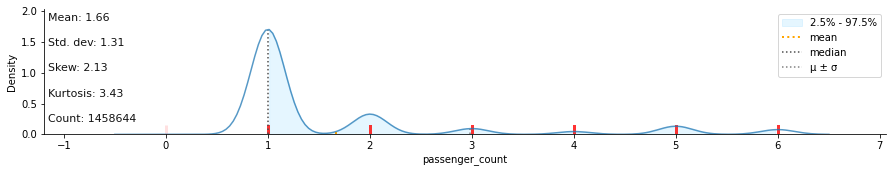

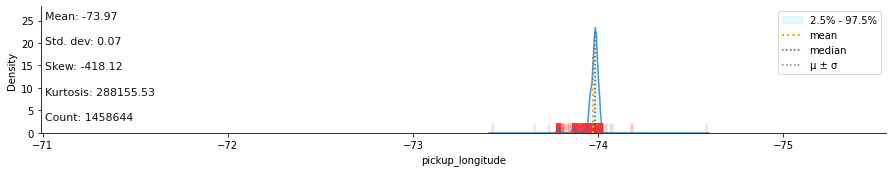

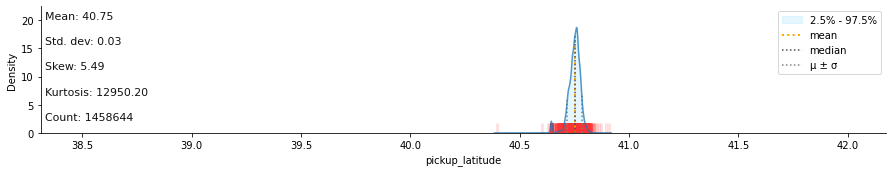

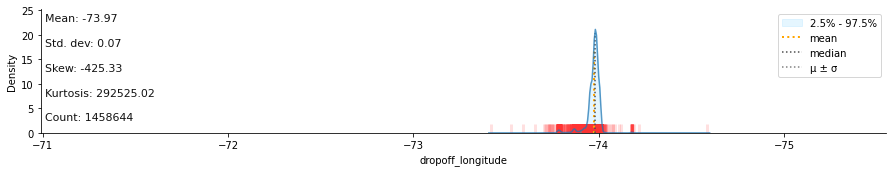

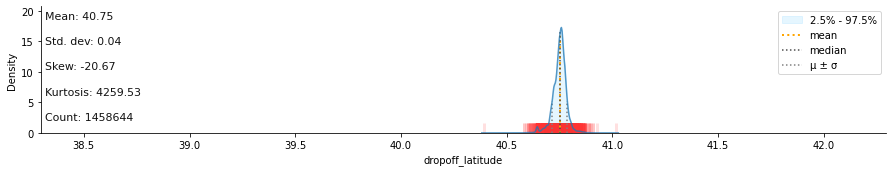

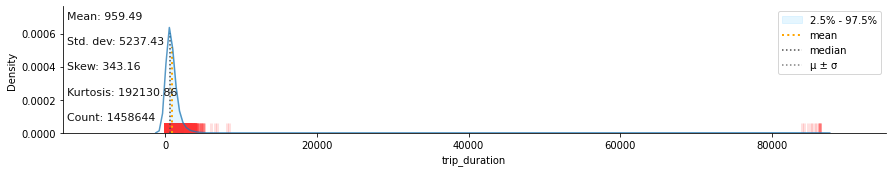

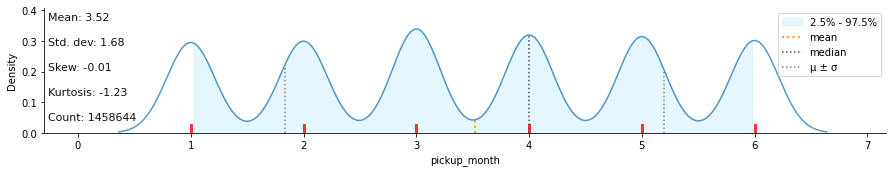

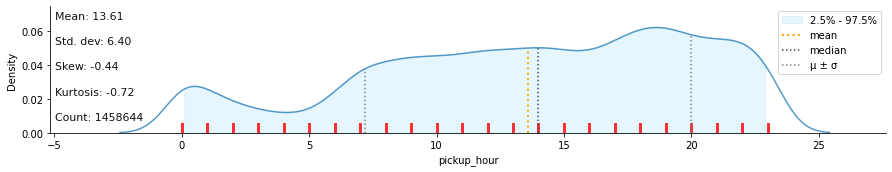

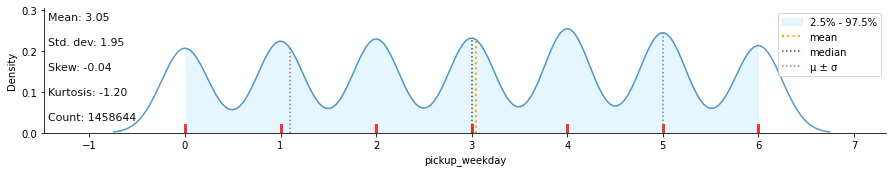

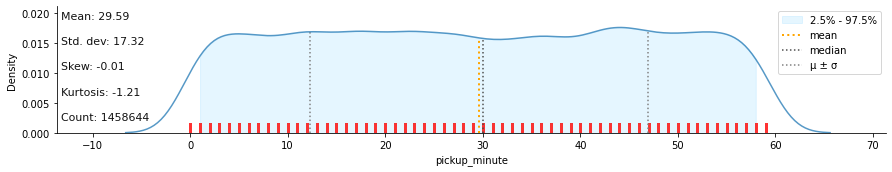

In [ ]:
# lets plot distribution to infer some insigts from available features

klib.dist_plot(df)

In [ ]:
# Outliers Visualization
def numeric_columns_plot(df):
  import warnings
  warnings.filterwarnings('ignore')
  import seaborn as sns
  ncols= len(df.columns) if len(df.columns) < 6 else 6
  nrows= int(len(df.columns)/5) if len(df.columns) > 6 else 1
  fig, axs = plt.subplots(ncols=ncols, nrows=nrows, figsize=(20, 10))
  index = 0
  axs = axs.flatten()
  for k,v in df.items():
    sns.boxplot(y=k, data=df, ax=axs[index])
    index += 1
  plt.tight_layout(pad=0.4, w_pad=0.5, h_pad=5.0)

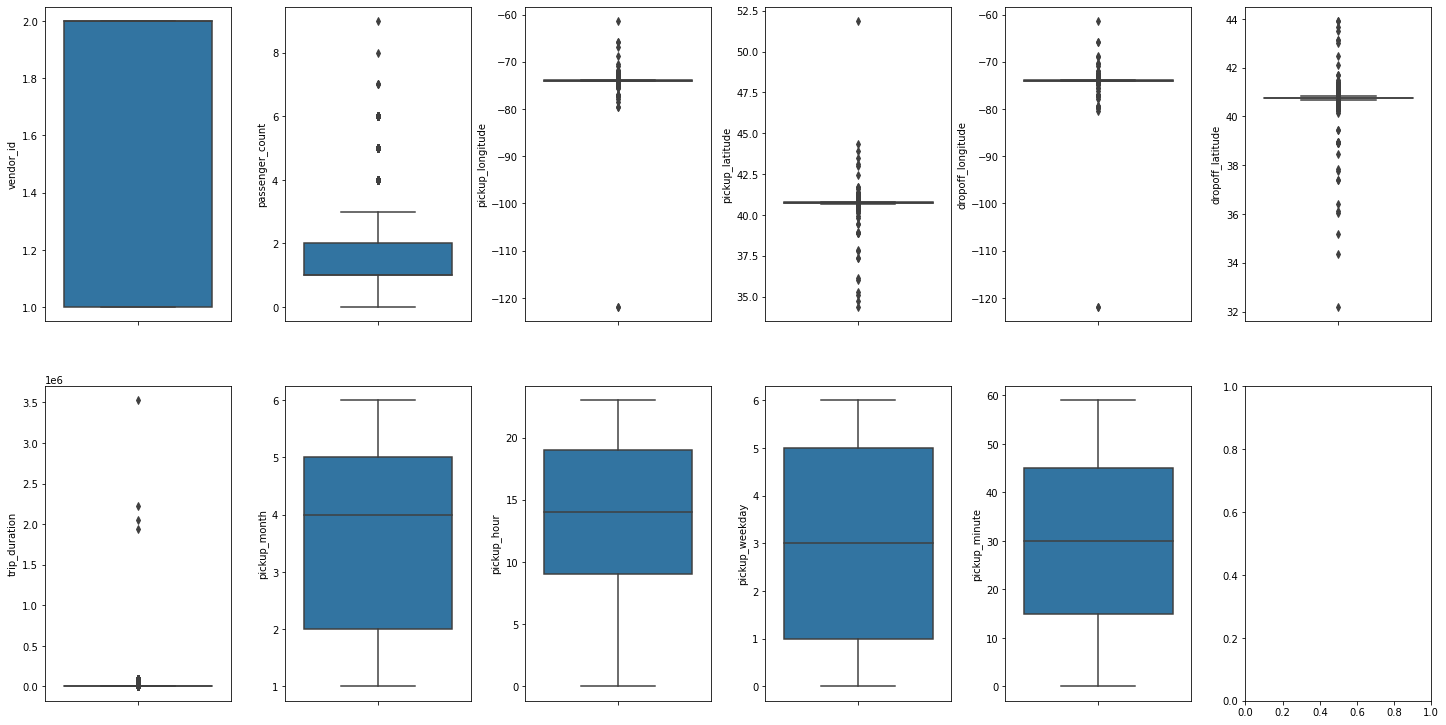

In [ ]:
numeric_columns_plot(df[df.describe().columns])

From above plots its clear that we have to focus more on passenger_count column and trip_duration column for outlier treatment

In [ ]:
 df.passenger_count.value_counts()

1    1033540
2     210318
5      78088
3      59896
6      48333
4      28404
0         60
7          3
9          1
8          1
Name: passenger_count, dtype: int64

1. We came to know that there are some entries where passenger counts are zero, this record might be representing the canceled trips but for our usecase it becomes not useful so we treat it as an outlier
2. passenger count contains some 7,8,9 values those doesn't have any weightage to stand with 14 billon records data and As its a driver entered value its error chances increases, so we can treat them also as an outlier.

In [ ]:
#lets clean passenger count data
df_nz=df[(df.passenger_count>0) & (df_nz.passenger_count<7)]

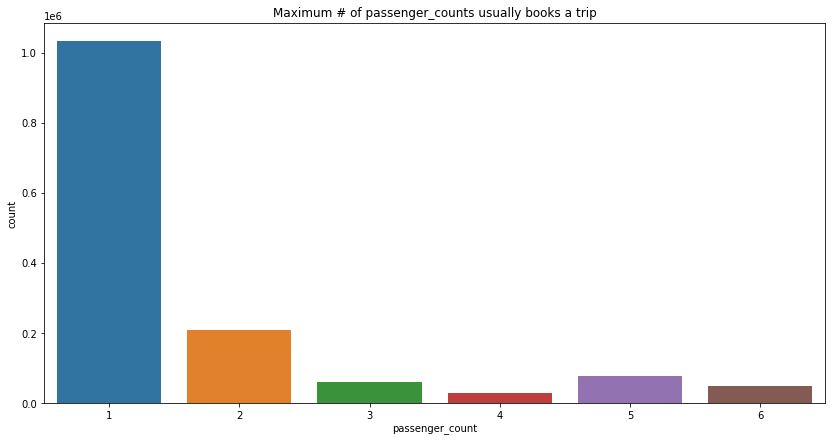

In [ ]:
plt.figure(figsize=(14,7))
sns.countplot(df_nz.passenger_count)
plt.title('Maximum # of passenger_counts usually books a trip')
plt.show()

In [ ]:
# checking for trips having more than one day duration
df_nz[(df_nz.trip_duration>86400)] # 24*60*60=86400 its a total seconds in a day

,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,trip_duration,pickup_month,pickup_day_name,pickup_hour,pickup_weekday,pickup_minute,pickup_day,dropoff_day,dropoff_day_name
355003,1,2016-01-05 00:19:42,2016-01-27 11:08:38,1,-73.78965,40.643559,-73.95681,40.773087,N,1939736,1,Tuesday,0,1,19,2016-01-05,2016-01-27,Wednesday
680594,1,2016-02-13 22:38:00,2016-03-08 15:57:38,2,-73.921677,40.735252,-73.984749,40.759979,N,2049578,2,Saturday,22,5,38,2016-02-13,2016-03-08,Tuesday
924150,1,2016-01-05 06:14:15,2016-01-31 01:01:07,1,-73.983788,40.742325,-73.985489,40.727676,N,2227612,1,Tuesday,6,1,14,2016-01-05,2016-01-31,Sunday
978383,1,2016-02-13 22:46:52,2016-03-25 18:18:14,1,-73.783905,40.648632,-73.978271,40.750202,N,3526282,2,Saturday,22,5,46,2016-02-13,2016-03-25,Friday


we came to know **4 no. of trip records** are having **more than 15 days trip duration** which seems to be unlikely thus we will trating it as **outlier**

In [ ]:
#cleaning data with removing more than one day trip duration
df_nz=df_nz[~(df_nz.trip_duration>86400)]

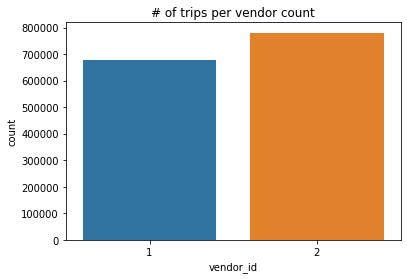

In [ ]:
# Vendor count
sns.countplot(df_nz.vendor_id)
plt.title('# of trips per vendor count')
plt.show()

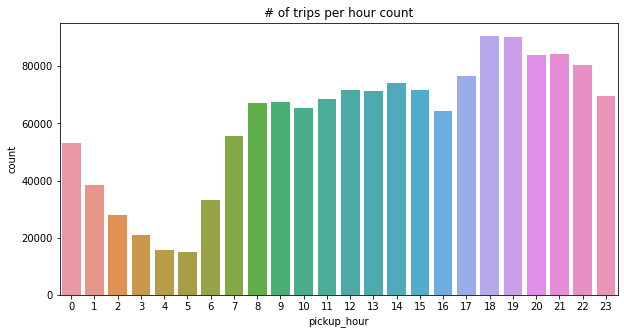

In [ ]:
plt.figure(figsize=(10,5))
sns.countplot(df_nz.pickup_hour)
plt.title('# of trips per hour count')
plt.show()

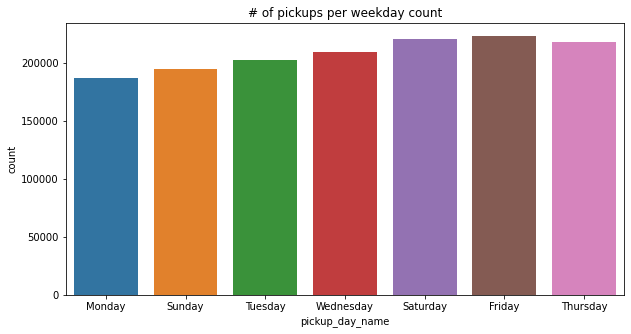

In [ ]:
plt.figure(figsize=(10,5))
sns.countplot(df_nz.pickup_day_name)
plt.title('# of pickups per weekday count')
plt.show()

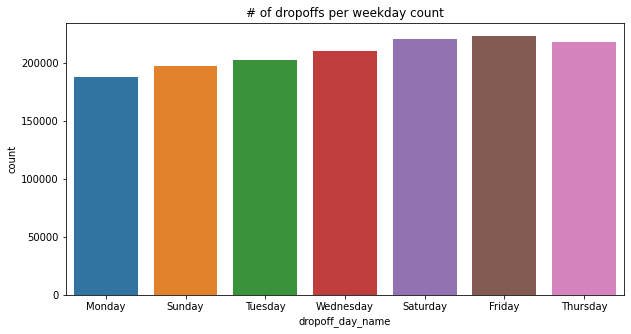

In [ ]:
plt.figure(figsize=(10,5))
sns.countplot(df_nz.dropoff_day_name)
plt.title('# of dropoffs per weekday count')
plt.show()

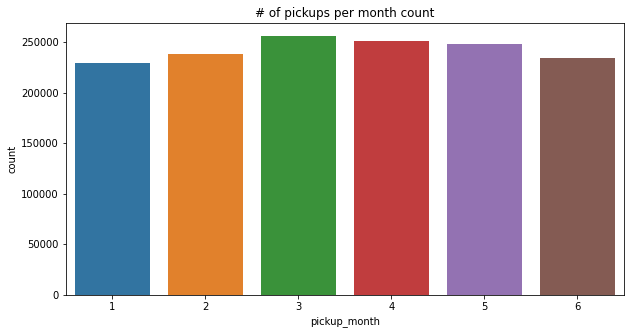

In [ ]:
plt.figure(figsize=(10,5))
sns.countplot(df_nz.pickup_month)
plt.title('# of pickups per month count')
plt.show()

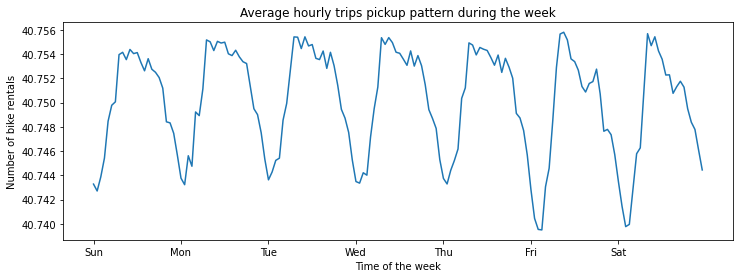

In [ ]:
#We can check for sesonality for pickups in a week on hourly basis

fig, ax = plt.subplots(figsize=(12, 4))
average_week_demand = df_nz.groupby(["pickup_weekday","pickup_hour"])['pickup_latitude'].mean()
average_week_demand.plot(ax=ax)
_ = ax.set(
    title="Average hourly trips pickup pattern during the week",
    xticks=[i * 24 for i in range(7)],
    xticklabels=["Sun", "Mon", "Tue", "Wed", "Thu", "Fri", "Sat"],
    xlabel="Time of the week",
    ylabel="Number of bike rentals")

We came to know that seasonality present in our data on weekday basis following some pattern in order to make model to understand these pattens we can convert our time data to cyclic  periods
Reference - https://scikit-learn.org/stable/auto_examples/applications/plot_cyclical_feature_engineering.html

to capture the natural periodicity we will use trignometric features(sin,cos). 

# Feature Engineering

In [ ]:
df.columns

Index(['vendor_id', 'pickup_datetime', 'dropoff_datetime', 'passenger_count',
       'pickup_longitude', 'pickup_latitude', 'dropoff_longitude',
       'dropoff_latitude', 'store_and_fwd_flag', 'trip_duration',
       'pickup_month', 'pickup_day_name', 'pickup_hour', 'pickup_weekday',
       'pickup_minute', 'pickup_day', 'dropoff_day', 'dropoff_day_name'],
      dtype='object')

In [ ]:
# As we discussed earlier we will drive trignometric features for time data.

df_nz['month_sin']=df_nz['pickup_month'].apply(lambda x: np.sin(x / 12 * 2 * np.pi))

df_nz['weekday_sin']=df_nz['pickup_weekday'].apply(lambda x: np.sin(x / 7 * 2 * np.pi))

df_nz['hour_sin']=df_nz['pickup_hour'].apply(lambda x: np.sin(x / 24 * 2 * np.pi))

In [ ]:
# feature engineering 

from sklearn.cluster import MiniBatchKMeans

# get time delta gap  
def get_time_feature2(df):
    df_ = df.copy()
    df_['pickup_datetime'] = pd.to_datetime(df_['pickup_datetime'])
    df_['pickup_minute'] = df_['pickup_datetime'].dt.minute
    df_['pickup_time_delta'] = (df_['pickup_datetime'] - df_['pickup_datetime'].min()).dt.total_seconds()
    df_['week_delta'] = df_['pickup_datetime'].dt.weekday + \
                        ((df_['pickup_datetime'].dt.hour + \
                        (df_['pickup_datetime'].dt.minute / 60.0)) / 24.0)
    df_['weekofyear'] = df_['pickup_datetime'].dt.weekofyear
    return df_



# make weekday and hour cyclic, since we want to let machine understand 
# these features are in fact periodically 
def get_time_cyclic(df):
    df_ = df.copy()
    df_.pickup_hour = df_.pickup_hour.astype('int')
    df_['week_delta_sin'] = np.sin((df_['week_delta'] / 7) * np.pi)**2
    df_['pickup_hour_sin'] = np.sin((df_['pickup_hour'] / 24) * np.pi)**2
    return df_


# Haversine distance
def get_haversine_distance(lat1, lng1, lat2, lng2):
    # km
    lat1, lng1, lat2, lng2 = map(np.radians, (lat1, lng1, lat2, lng2))
    AVG_EARTH_RADIUS = 6371  #  km
    lat = lat2 - lat1
    lng = lng2 - lng1
    d = np.sin(lat * 0.5) ** 2 + np.cos(lat1) * np.cos(lat2) * np.sin(lng * 0.5) ** 2
    h = 2 * AVG_EARTH_RADIUS * np.arcsin(np.sqrt(d))
    return h 

# Manhattan distance
# Taxi cant fly ! have to move in blocks/roads
def get_manhattan_distance(lat1, lng1, lat2, lng2):
    # km 
    a = get_haversine_distance(lat1, lng1, lat1, lng2)
    b = get_haversine_distance(lat1, lng1, lat2, lng1)
    return a + b


# get direction (arc tangent angle)
def get_direction(lat1, lng1, lat2, lng2):
    # theta
    AVG_EARTH_RADIUS = 6371  #  km
    lng_delta_rad = np.radians(lng2 - lng1)
    lat1, lng1, lat2, lng2 = map(np.radians, (lat1, lng1, lat2, lng2))
    y = np.sin(lng_delta_rad) * np.cos(lat2)
    x = np.cos(lat1) * np.sin(lat2) - np.sin(lat1) * np.cos(lat2) * np.cos(lng_delta_rad)
    return np.degrees(np.arctan2(y, x))


def gat_trip_center(df):
    df_ = df.copy()
    df_.loc[:, 'center_latitude'] = (df_['pickup_latitude'].values + df_['dropoff_latitude'].values) / 2
    df_.loc[:, 'center_longitude'] = (df_['pickup_longitude'].values + df_['dropoff_longitude'].values) / 2
    return df_



# PCA to transform longitude and latitude
# to improve decision tree performance 
from sklearn.decomposition import PCA
def pca_lon_lat(dftrain,dftest):
    X = np.vstack \
            ((dftrain[['pickup_latitude', 'pickup_longitude']].values,
              dftrain[['dropoff_latitude', 'dropoff_longitude']].values,
              dftest[['pickup_latitude', 'pickup_longitude']].values,
              dftest[['dropoff_latitude', 'dropoff_longitude']].values))
    # remove potential lon & lat outliers 
    min_lat, min_lng = X.mean(axis=0) - X.std(axis=0)
    max_lat, max_lng = X.mean(axis=0) + X.std(axis=0)
    X = X[(X[:,0] > min_lat) & (X[:,0] < max_lat) & (X[:,1] > min_lng) & (X[:,1] < max_lng)]
    pca = PCA().fit(X)
    dftrain['pickup_pca0'] = pca.transform(dftrain[['pickup_latitude', 'pickup_longitude']])[:, 0]
    dftrain['pickup_pca1'] = pca.transform(dftrain[['pickup_latitude', 'pickup_longitude']])[:, 1]
    dftrain['dropoff_pca0'] = pca.transform(dftrain[['dropoff_latitude', 'dropoff_longitude']])[:, 0]
    dftrain['dropoff_pca1'] = pca.transform(dftrain[['dropoff_latitude', 'dropoff_longitude']])[:, 1]
    dftest['pickup_pca0'] = pca.transform(dftest[['pickup_latitude', 'pickup_longitude']])[:, 0]
    dftest['pickup_pca1'] = pca.transform(dftest[['pickup_latitude', 'pickup_longitude']])[:, 1]
    dftest['dropoff_pca0'] = pca.transform(dftest[['dropoff_latitude', 'dropoff_longitude']])[:, 0]
    dftest['dropoff_pca1'] = pca.transform(dftest[['dropoff_latitude', 'dropoff_longitude']])[:, 1]
    # manhattan distance from pca lon & lat 
    dftrain.loc[:, 'pca_manhattan'] = np.abs(dftrain['dropoff_pca1'] - dftrain['pickup_pca1']) + np.abs(dftrain['dropoff_pca0'] - dftrain['pickup_pca0'])
    dftest.loc[:, 'pca_manhattan'] = np.abs(dftest['dropoff_pca1'] - dftest['pickup_pca1']) + np.abs(dftest['dropoff_pca0'] - dftest['pickup_pca0'])
    return dftrain,dftest 


# get lon & lat clustering for following avg location speed calculation
def get_clustering(df):
    coords = np.vstack((df_train[['pickup_latitude', 'pickup_longitude']].values,
                    df_train[['dropoff_latitude', 'dropoff_longitude']].values,
                    df_test[['pickup_latitude', 'pickup_longitude']].values,
                    df_test[['dropoff_latitude', 'dropoff_longitude']].values))
    df_ = df.copy()
    sample_ind = np.random.permutation(len(coords))[:500000]
    kmeans = MiniBatchKMeans(n_clusters=100, batch_size=10000).fit(coords[sample_ind])
    df_.loc[:, 'pickup_cluster'] = kmeans.predict(df_[['pickup_latitude', 'pickup_longitude']])
    df_.loc[:, 'dropoff_cluster'] = kmeans.predict(df_[['dropoff_latitude', 'dropoff_longitude']])
    return df_


def trip_cluser_count(df):
    df_ = df.copy()
    df_.pickup_datetime = pd.to_datetime(df_.pickup_datetime)
    group_freq = '60min'
    df_dropoff_counts = df_ \
        .set_index('pickup_datetime') \
        .groupby([pd.TimeGrouper(group_freq), 'dropoff_cluster']) \
        .agg({'id': 'count'}) \
        .reset_index().set_index('pickup_datetime') \
        .groupby('dropoff_cluster').rolling('240min').mean() \
        .drop('dropoff_cluster', axis=1) \
        .reset_index().set_index('pickup_datetime').shift(freq='-120min').reset_index() \
        .rename(columns={'pickup_datetime': 'pickup_datetime_group', 'id': 'dropoff_cluster_count'})
        
    df_['pickup_datetime_group'] = df_['pickup_datetime'].dt.round(group_freq)
    df_['dropoff_cluster_count'] = \
            df_[['pickup_datetime_group', 'dropoff_cluster']]\
            .merge(df_dropoff_counts,on=['pickup_datetime_group', 'dropoff_cluster'], how='left')\
            ['dropoff_cluster_count'].fillna(0)
            
    return df_



# avg speed on cluster 
def avg_cluser_speed(df):
    df_ = df.copy()
    # avg speed on cluster 
    avg_cluser_h = df_.groupby(['pickup_cluster','dropoff_cluster']).mean()['avg_speed_h'].reset_index()
    avg_cluser_h.columns = ['pickup_cluster','dropoff_cluster','avg_speed_cluster_h']
    avg_cluser_m = df_.groupby(['pickup_cluster','dropoff_cluster']).mean()['avg_speed_m'].reset_index()
    avg_cluser_m.columns = ['pickup_cluster','dropoff_cluster','avg_speed_cluster_m']
    # merge dataframe
    df_ = pd.merge(df_,avg_cluser_h, how = 'left', on = ['pickup_cluster','dropoff_cluster'])
    df_ = pd.merge(df_,avg_cluser_m, how = 'left', on = ['pickup_cluster','dropoff_cluster'])
    return df_


# avg duration on cluster 
def avg_cluser_duration(df):
    df_ = df.copy()
    # avg speed on cluster 
    avg_cluser_duration = df_.groupby(['pickup_cluster','dropoff_cluster']).mean()['trip_duration'].reset_index()
    avg_cluser_duration.columns = ['pickup_cluster','dropoff_cluster','avg_cluster_duration']
    # merge dataframe
    df_ = pd.merge(df_,avg_cluser_duration, how = 'left', on = ['pickup_cluster','dropoff_cluster'])
    return df_


def avg_cluster_speed_(df):
    df_ = df.copy()
    # only get pickup_cluster first as test here 
    for gby_col in ['pickup_cluster']:
        gby = df_.groupby(gby_col).mean()[['avg_speed_h', 'avg_speed_m', 'trip_duration']]
        gby.columns = ['%s_gby_%s' % (col, gby_col) for col in gby.columns]
        df_ = pd.merge(df_, gby, how='left', left_on=gby_col, right_index=True)
        #df_test = pd.merge(df_test, gby, how='left', left_on=gby_col, right_index=True)
    for gby_cols in [
                 ['pickup_cluster', 'dropoff_cluster']]:
        coord_speed = df_.groupby(gby_cols).mean()[['avg_speed_h']].reset_index()
        coord_count = df_.groupby(gby_cols).count()[['id']].reset_index()
        coord_stats = pd.merge(coord_speed, coord_count, on=gby_cols)
        #coord_stats = coord_stats[coord_stats['id'] > 100]
        coord_stats.columns = gby_cols + ['avg_speed_h_%s' % '_'.join(gby_cols), 'cnt_%s' %  '_'.join(gby_cols)]
        df_ = pd.merge(df_, coord_stats, how='left', on=gby_cols)
    return df_


def label_2_binary(df):
    df_ = df.copy()
    df_['store_and_fwd_flag_'] = df_['store_and_fwd_flag'].map(lambda x: 0 if x =='N' else 1)
    return df_


### ======================== ###

def get_features(df):
    # km 
    df_ = df.copy()
    ###  USING .loc making return array ordering 
    # distance
    df_.loc[:, 'distance_haversine'] = get_haversine_distance(
                                      df_['pickup_latitude'].values,
                                      df_['pickup_longitude'].values,
                                      df_['dropoff_latitude'].values,
                                      df_['dropoff_longitude'].values)
    df_.loc[:, 'distance_manhattan'] = get_manhattan_distance(
                                      df_['pickup_latitude'].values,
                                      df_['pickup_longitude'].values,
                                      df_['dropoff_latitude'].values,
                                      df_['dropoff_longitude'].values)
    # direction 
    df_.loc[:, 'direction'] = get_direction(df_['pickup_latitude'].values,
                                          df_['pickup_longitude'].values, 
                                          df_['dropoff_latitude'].values, 
                                          df_['dropoff_longitude'].values)
    # Get Average driving speed 
    # km/hr
    # (km/sec = 3600 * (km/hr))
    # in case trip duration is not available in test dataset 
    try:
        df_.loc[:, 'avg_speed_h'] = 3600 * df_['distance_haversine'] / df_['trip_duration']
        df_.loc[:, 'avg_speed_m'] = 3600 * df_['distance_manhattan'] / df_['trip_duration']
    except:
        pass
    
    return df_

In [ ]:
pickup=tuple(zip(df_nz_pt.pickup_latitude,df_nz_pt.pickup_longitude))
dropoff=tuple(zip(df_nz_pt.dropoff_latitude,df_nz_pt.dropoff_longitude))

In [ ]:
from geopy.distance import geodesic
distance_in_km=[]
# distance_in_miles = geodesic(coordinate1, coordinate2).miles
for i in range(len(pickup)):
  distance = geodesic(pickup[i],dropoff[i]).km
  distance_in_km.append(distance)
# note: coordinates must be in a tuple of (lat, long)

In [ ]:
df_nz_pt['distance_in_km']=distance_in_km

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


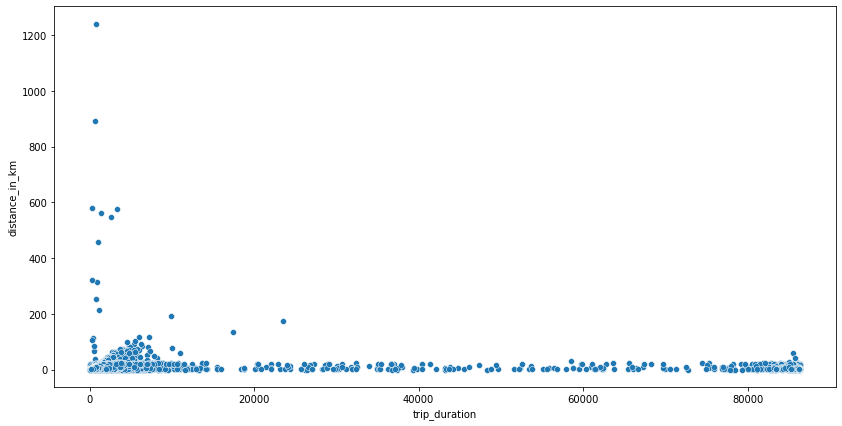

In [ ]:
plt.figure(figsize=(14,7))
sns.scatterplot(df_nz_pt.trip_duration,df_nz_pt.distance_in_km)

In [ ]:
df_nz_pt=df_nz_pt[df_nz_pt.distance_in_km<400]

In [ ]:
df_nz_pt['day_session'] = np.nan
df_nz_pt.loc[df_nz_pt.pickup_hour < 7, 'day_session'] = 'early_morning'
df_nz_pt.loc[(df_nz_pt.pickup_hour >= 7) & (df_nz_pt.pickup_hour < 18), 'day_session'] = 'day_time'
df_nz_pt.loc[(df_nz_pt.pickup_hour >= 18) & (df_nz_pt.pickup_hour < 21), 'day_session'] = 'evening'
df_nz_pt.loc[(df_nz_pt.pickup_hour >= 21) & (df_nz_pt.pickup_hour <= 24), 'day_session'] = 'night'


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:1817: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value, pi)


In [ ]:
df_nz_pt.head()

,Unnamed: 0,id,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,...,trip_duration,pickup_month,pickup_day_name,pickup_hour,pickup_minute,pickup_day,dropoff_day,dropoff_day_name,distance_in_km,day_session
0,0,id2875421,2,2016-03-14 17:24:55,2016-03-14 17:32:30,1,-73.982155,40.767937,-73.964630,40.765602,...,455,3,Monday,17,24,2016-03-14,2016-03-14,Monday,1.502172,day_time
1,1,id2377394,1,2016-06-12 00:43:35,2016-06-12 00:54:38,1,-73.980415,40.738564,-73.999481,40.731152,...,663,6,Sunday,0,43,2016-06-12,2016-06-12,Sunday,1.808660,early_morning
2,2,id3858529,2,2016-01-19 11:35:24,2016-01-19 12:10:48,1,-73.979027,40.763939,-74.005333,40.710087,...,2124,1,Tuesday,11,35,2016-01-19,2016-01-19,Tuesday,6.379687,day_time
3,3,id3504673,2,2016-04-06 19:32:31,2016-04-06 19:39:40,1,-74.010040,40.719971,-74.012268,40.706718,...,429,4,Wednesday,19,32,2016-04-06,2016-04-06,Wednesday,1.483632,evening
4,4,id2181028,2,2016-03-26 13:30:55,2016-03-26 13:38:10,1,-73.973053,40.793209,-73.972923,40.782520,...,435,3,Saturday,13,30,2016-03-26,2016-03-26,Saturday,1.187038,day_time


In [ ]:
###clean csv file
# df_nz_pt.to_csv('/content/drive/MyDrive/almabetter/capstone projects/NYC taxi trip duration -regression/df_nz_pt.csv')
df_nz_pt=pd.read_csv('/content/drive/MyDrive/almabetter/capstone projects/NYC taxi trip duration -regression/df_nz_pt.csv')

In [ ]:

# # import the folium, pandas libraries
# import folium
  
# # initialize the map and store it in a m object
# for i in range(len(a)):
#   m = folium.Map(location = a[i],
#                zoom_start = 4)
  
# # show the map
# m.save('my_map.html')

In [ ]:
# mar = folium.Map(
#     location=[df.pickup_latitude[0],df.pickup_longitude[0]],
#     tiles='Stamen Terrain',
#     zoom_start=13
# )

# for i in a:
#   folium.Marker(
#     list(i),
#     popup='pickup'
# ).add_to(mar)

# mar.save('mar.html')
# mar

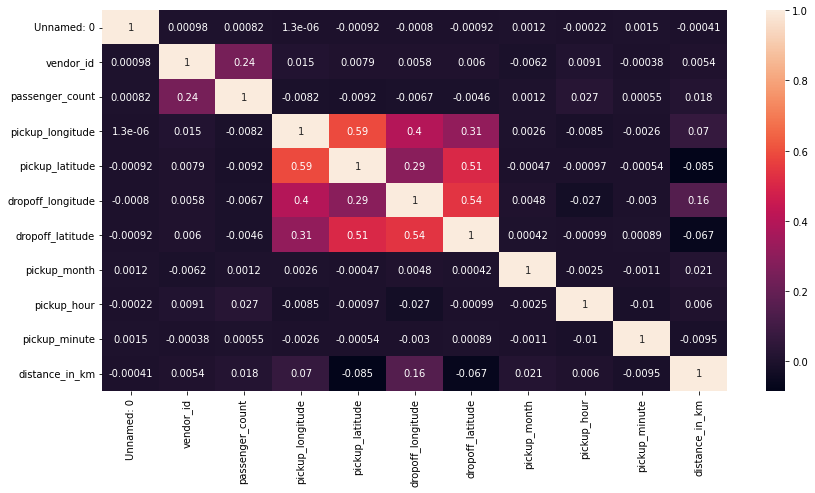

In [ ]:
plt.figure(figsize=(14,7))
sns.heatmap(df_nz_pt.drop('trip_duration',axis=1).corr(method='spearman'),annot=True)

In [ ]:
df_nz_pt.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1458568 entries, 0 to 1458574
Data columns (total 21 columns):
 #   Column              Non-Null Count    Dtype  
---  ------              --------------    -----  
 0   Unnamed: 0          1458568 non-null  int64  
 1   id                  1458568 non-null  object 
 2   vendor_id           1458568 non-null  int64  
 3   pickup_datetime     1458568 non-null  object 
 4   dropoff_datetime    1458568 non-null  object 
 5   passenger_count     1458568 non-null  int64  
 6   pickup_longitude    1458568 non-null  float64
 7   pickup_latitude     1458568 non-null  float64
 8   dropoff_longitude   1458568 non-null  float64
 9   dropoff_latitude    1458568 non-null  float64
 10  store_and_fwd_flag  1458568 non-null  object 
 11  trip_duration       1458568 non-null  int64  
 12  pickup_month        1458568 non-null  int64  
 13  pickup_day_name     1458568 non-null  object 
 14  pickup_hour         1458568 non-null  int64  
 15  pickup_minute  

In [ ]:
abs(df_nz_pt.corr(method='spearman')['trip_duration'])

Unnamed: 0           0.000351
vendor_id            0.009261
passenger_count      0.026256
pickup_longitude     0.025937
pickup_latitude      0.107268
dropoff_longitude    0.067031
dropoff_latitude     0.122368
trip_duration        1.000000
pickup_month         0.049746
pickup_hour          0.031125
pickup_minute        0.010872
distance_in_km       0.794232
Name: trip_duration, dtype: float64

In [ ]:
df_nz_pt.var()

vendor_id            2.487784e-01
passenger_count      1.727076e+00
pickup_longitude     5.022801e-03
pickup_latitude      9.741278e-04
dropoff_longitude    4.875954e-03
dropoff_latitude     1.259755e-03
trip_duration        1.005279e+07
pickup_month         2.825878e+00
pickup_hour          4.095460e+01
pickup_minute        3.001471e+02
pickup_year          0.000000e+00
distance_in_km       1.589288e+01
dtype: float64

In [ ]:
df_nz_pt.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1458568 entries, 0 to 1458574
Data columns (total 21 columns):
 #   Column              Non-Null Count    Dtype  
---  ------              --------------    -----  
 0   Unnamed: 0          1458568 non-null  int64  
 1   id                  1458568 non-null  object 
 2   vendor_id           1458568 non-null  int64  
 3   pickup_datetime     1458568 non-null  object 
 4   dropoff_datetime    1458568 non-null  object 
 5   passenger_count     1458568 non-null  int64  
 6   pickup_longitude    1458568 non-null  float64
 7   pickup_latitude     1458568 non-null  float64
 8   dropoff_longitude   1458568 non-null  float64
 9   dropoff_latitude    1458568 non-null  float64
 10  store_and_fwd_flag  1458568 non-null  object 
 11  trip_duration       1458568 non-null  int64  
 12  pickup_month        1458568 non-null  int64  
 13  pickup_day_name     1458568 non-null  object 
 14  pickup_hour         1458568 non-null  int64  
 15  pickup_minute  

In [ ]:
# df_dummy=df_nz_pt.loc[:,['vendor_id',
#        'passenger_count','pickup_latitude',
#         'dropoff_latitude', 'store_and_fwd_flag',
#        'trip_duration', 'pickup_month', 'pickup_day_name', 'pickup_hour',
#        'distance_in_km', 'day_session']]
# df_dummies=pd.get_dummies(df_dummy,drop_first=True)

In [ ]:
feature_col=['vendor_id','passenger_count','pickup_latitude','dropoff_latitude','store_and_fwd_flag','pickup_month',
       'pickup_day_name','pickup_hour','distance_in_km','day_session']

In [ ]:
feature=df_nz_pt[feature_col]

label=df_nz_pt['trip_duration']

In [ ]:
feature_dummies=pd.get_dummies(feature,drop_first=True)

In [ ]:
feature.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1458568 entries, 0 to 1458643
Data columns (total 11 columns):
 #   Column              Non-Null Count    Dtype  
---  ------              --------------    -----  
 0   vendor_id           1458568 non-null  int64  
 1   passenger_count     1458568 non-null  int64  
 2   pickup_latitude     1458568 non-null  float64
 3   dropoff_latitude    1458568 non-null  float64
 4   store_and_fwd_flag  1458568 non-null  object 
 5   pickup_month        1458568 non-null  int64  
 6   pickup_day_name     1458568 non-null  object 
 7   pickup_hour         1458568 non-null  int64  
 8   pickup_minute       1458568 non-null  int64  
 9   distance_in_km      1458568 non-null  float64
 10  day_session         1458568 non-null  object 
dtypes: float64(3), int64(5), object(3)
memory usage: 133.5+ MB


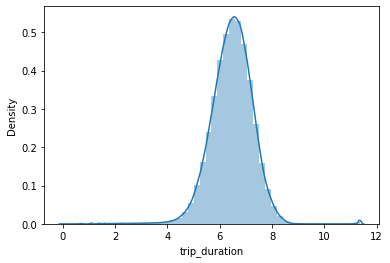

In [ ]:
sns.distplot(np.log(label))

In [ ]:
label_log=np.log(label)

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error,mean_absolute_error,r2_score
from sklearn.model_selection import cross_val_score,KFold,StratifiedKFold,cross_val_predict

x_train,x_test,y_train,y_test=train_test_split(feature_dummies, label_log, test_size=0.45,random_state=40)

kfold=KFold(n_splits=5)

from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
x_train=scaler.fit_transform(x_train)
x_test=scaler.transform(x_test)

In [ ]:
def print_metrics(actual,prediction,model=''):

  print(f"{model}  R2:", r2_score(actual,prediction))
  print(f"{model}  MAE:", mean_absolute_error(actual,prediction))
  print(f"{model}  MSE:", mean_squared_error(actual,prediction))
  print(f"{model}  RMSE:", np.sqrt(mean_squared_error(actual,prediction)))

In [ ]:
#baseline model
test=pd.DataFrame()
test['y_test']=pd.DataFrame(y_test.values)
test['ymean']=test.y_test.mean()

print_metrics((test['y_test']),(test['ymean']),'Base')


Base  R2: 1.1102230246251565e-16
Base  MAE: 0.6071633014222866
Base  MSE: 0.6395573763027949
Base  RMSE: 0.7997233123417091


In [ ]:
from sklearn.linear_model import LinearRegression

lr = LinearRegression().fit(x_train,y_train)
y_pred = cross_val_predict(lr,x_train,y_train,cv=5)

print_metrics((y_train),(y_pred),'LR')

LR  R2: 0.4073477403937772
LR  MAE: 0.4398627288566456
LR  MSE: 0.3780250219635826
LR  RMSE: 0.6148373947342359


In [ ]:
# from sklearn.neighbors import NearestNeighbors, KNeighborsClassifier, KNeighborsRegressor

# knn = KNeighborsRegressor(n_neighbors=10)
# y_pred = cross_val_predict(knn,x_train,y_train,cv=5)

# print_metrics(y_train,y_pred,'KNN')


In [ ]:
from sklearn.ensemble import RandomForestRegressor
rf = RandomForestRegressor(criterion='squared_error',random_state=100,n_estimators=2,max_depth=8).fit(x_train,y_train)
y_pred = cross_val_predict(rf,x_train,y_train,cv=5)

print_metrics((y_train),(y_pred),'RF')

RF  R2: 0.6651112119759619
RF  MAE: 0.31562693646851636
RF  MSE: 0.2136098182301021
RF  RMSE: 0.462179422118837


In [ ]:
# from sklearn.preprocessing import StandardScaler
# from sklearn.ensemble import RandomForestRegressor
# from sklearn.model_selection import cross_val_score,KFold,StratifiedKFold,cross_val_predict

# vals = [0.1,0.2,0.3,0.4,0.5,0.6,0.7]
# a=df_nz_pt.corr(method='spearman')['trip_duration']
# for val in vals:
#     features = list((a[(a>val) ==True]).index)
#     features=features.remove('trip_duration')
#     feature_dummies=pd.get_dummies(feature,drop_first=True)
#     x_train,x_test,y_train,y_test=train_test_split(feature_dummies, label_log, test_size=0.45,random_state=40)
    
#     scaler = StandardScaler()
#     x_train=scaler.fit_transform(x_train)
#     x_test=scaler.transform(x_test)
   
    
#     print(features)
#     rf = RandomForestRegressor(criterion='squared_error',random_state=10,n_estimators=2,max_depth=8).fit(x_train,y_train)
#     y_pred = cross_val_predict(rf,x_train,y_train,cv=5)

#     print_metrics(np.exp(y_train),np.exp(y_pred),'RF')

None
RF  R2: 0.029366449796821348
RF  MAE: 344.5515998057823
RF  MSE: 9858729.245292297
RF  RMSE: 3139.8613417302836
None
RF  R2: 0.029366449796821348
RF  MAE: 344.5515998057823
RF  MSE: 9858729.245292297
RF  RMSE: 3139.8613417302836
None


KeyboardInterrupt: ignored

In [ ]:
from sklearn.ensemble import RandomForestRegressor
for i in range(2,9):
  rf = RandomForestRegressor(criterion='squared_error',random_state=100,n_estimators=20,max_depth=i).fit(x_train,y_train)
  y_pred = cross_val_predict(rf,x_train,y_train,cv=5)

  print_metrics(np.exp(y_train),np.exp(y_pred),'RF')

RF  R2: 0.0193316374870105
RF  MAE: 407.29022452846567
RF  MSE: 9960652.878128853
RF  RMSE: 3156.050202092618
RF  R2: 0.0241715011933068
RF  MAE: 382.9974538205456
RF  MSE: 9911494.361143215
RF  RMSE: 3148.2525885232294
RF  R2: 0.02598528262649824
RF  MAE: 371.83724175161814
RF  MSE: 9893071.775136137
RF  RMSE: 3145.3253846201887
RF  R2: 0.027108419986583754
RF  MAE: 362.24488773354864
RF  MSE: 9881664.064022053
RF  RMSE: 3143.5114226008554
RF  R2: 0.028190268931229112
RF  MAE: 353.9804437830709
RF  MSE: 9870675.71952548
RF  RMSE: 3141.7631545877994
RF  R2: 0.028914371948942197
RF  MAE: 347.82033936981355
RF  MSE: 9863321.00198472
RF  RMSE: 3140.5924603464105
RF  R2: 0.02953304147675251
RF  MAE: 342.18696111185363
RF  MSE: 9857037.17286536
RF  RMSE: 3139.59187998462


In [ ]:
a

['Unnamed: 0',
 'vendor_id',
 'passenger_count',
 'pickup_longitude',
 'pickup_latitude',
 'dropoff_longitude',
 'dropoff_latitude',
 'pickup_month',
 'pickup_hour',
 'pickup_minute',
 'distance_in_km']

In [ ]:
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import RandomForestRegressor



gbrt = GradientBoostingRegressor(criterion='mse',random_state=10,n_estimators=2).fit(x_train,y_train)
cv = cross_val_score (gbrt,x_train,y_train,cv=5)
print(" Average CV is: ", cv.mean())
Ypred=gbrt.predict(x_test)
MAE=mean_absolute_error(y_test,Ypred)
MSE=mean_squared_error(y_test,Ypred)
print("GBR MAE:", MAE)
print("GBR MSE:", MSE)
print("GBR RMSE:", np.sqrt(MSE))
print("GBR Training set score: {:.5f}".format(gbrt.score(x_train,y_train)))
print("GBR Test set score: {:.5f}".format(gbrt.score(x_test,y_test)))

/usr/local/lib/python3.7/dist-packages/sklearn/ensemble/_gb.py:475: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/tree/_classes.py:363: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/tree/_classes.py:363: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/ensemble/_gb.py:475: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/tree/_classes.py:363: FutureWarning: Cr

 Average CV is:  0.19783339539329436
GBR MAE: 0.23307284517575388
GBR MSE: 0.0964722168392031
GBR RMSE: 0.310599769541452
GBR Training set score: 0.19797
GBR Test set score: 0.19767


In [ ]:
10**Ypred

array([ 424.63694306,  764.92681001, 3214.90703271, ..., 1564.03538383,
        681.61763334,  529.66945552])

In [ ]:

MAE=mean_absolute_error(10**y_test,10**Ypred)
MSE=mean_squared_error(10**y_test,10**Ypred)
print("RF MAE:", MAE)
print("RF MSE:", MSE)
print("RF RMSE:", np.sqrt(MSE))

RF MAE: 306214193717.84814
RF MSE: 3.419162204737427e+28
RF RMSE: 184909767311989.97
